# Prediction of Health Insurance Charges Using Random Forest Regression

## Introduction

Welcome to our comprehensive Jupyter notebook, where we delve into the world of predictive analytics in the health insurance sector. Utilizing a detailed dataset of insurance charges, we apply advanced machine learning techniques to forecast insurance costs. Our primary tool is the Random Forest Regressor, a robust and versatile algorithm well-suited for handling complex datasets with multiple features.

In this notebook, we systematically approach the problem starting from data preprocessing, involving scaling and encoding, to applying sophisticated machine learning models. Our journey through the data includes exploratory analysis, model training, performance evaluation, and hyperparameter tuning to refine our predictions.

## Importing Libraries

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from numpy import log
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict,GridSearchCV
import seaborn as sns

## Table of Contents

1. [Introduction](#Introduction)
   - Overview of the project and objectives
   - Brief description of the dataset and its significance

2. [Data Preparation and Feature Engineering](#Data-Preparation-and-Feature-Engineering)
   - Importing necessary libraries
   - Loading and exploring the dataset
   - Data preprocessing (scaling and encoding)
   - Feature selection and engineering

3. [Model Development and Validation](#Model-Development-and-Validation)
   - 3.1. [Model Training](#Model-Training)
     - Initializing the RandomForestRegressor
     - Fitting the model to the training data
   - 3.2. [Model Prediction and Performance Evaluation](#Model-Prediction-and-Performance-Evaluation)
     - Predicting insurance charges on the test data
     - Evaluating model performance (MAE, MSE, RMSE, R-squared)
   - 3.3. [Feature Importance Analysis](#Feature-Importance-Analysis)
     - Analyzing and visualizing the importance of different features
   - 3.4. [Cross-Validation](#Cross-Validation)
     - Implementing 5-fold cross-validation
     - Analyzing cross-validation results

4. [Graphical Analysis](#Graphical-Analysis)
   - 4.1. [Actual vs Predicted Charges Plot](#Actual-vs-Predicted-Charges-Plot)
     - Visual comparison between actual and predicted insurance charges
   - 4.2. [Residual Plot](#Residual-Plot)
     - Analyzing residuals to understand model errors

5. [Hyperparameter Tuning and Model Optimization](#Hyperparameter-Tuning-and-Model-Optimization)
   - Implementing GridSearchCV for hyperparameter optimization
   - Evaluating the optimized model

6. [Overfitting Check and Final Model Evaluation](#Overfitting-Check-and-Final-Model-Evaluation)
   - Comparing training, test, and cross-validation scores
   - Assessing the presence of overfitting

7. [Conclusions and Future Work](#Conclusions-and-Future-Work)
   - Summarizing findings and model performance
   - Suggestions for future enhancements and applications

8. [Appendix](#Appendix)
   - 8.1. [Saving the Model](#Saving-the-Model)
     - Code for saving the trained model
   - 8.2. [Loading the Model](#Loading-the-Model)
     - Instructions for loading the model for future use

In [2]:
data=pd.read_csv("../Data/insurance_cleaned.csv")
df=data.copy()

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,heavy,0,yes,southwest,16884.92400
1,28,male,too_heavy,3,no,southeast,4449.46200
2,33,male,normal,0,no,northwest,21984.47061
3,32,male,heavy,0,no,northwest,3866.85520
4,31,female,heavy,0,no,southeast,3756.62160


In [3]:
df_new=df.copy()
df_new=pd.get_dummies(data=df,columns=["sex","smoker"],drop_first=True)

In [4]:
df_new=pd.get_dummies(data=df_new,columns=["region","bmi"])

In [5]:
df_new['charges'] = df_new['charges'].apply(lambda x: log(x))

sc=StandardScaler()
df_scaled=pd.DataFrame(sc.fit_transform(df_new),columns=df_new.columns,index=df_new.index)

df_scaled.head()

,age,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,bmi_heavy,bmi_normal,bmi_too_heavy,bmi_too_weak
0,-1.472578,-0.900260,0.684392,-1.006079,1.972027,-0.563352,-0.571518,-0.603023,1.749725,1.587451,-0.444772,-1.073939,-0.124035
1,-0.825961,1.585814,-0.773628,0.993958,-0.507093,-0.563352,-0.571518,1.658312,-0.571518,-0.629941,-0.444772,0.931152,-0.124035
2,-0.466729,-0.900260,0.972921,0.993958,-0.507093,-0.563352,1.749725,-0.603023,-0.571518,-0.629941,2.248343,-1.073939,-0.124035
3,-0.538575,-0.900260,-0.927058,0.993958,-0.507093,-0.563352,1.749725,-0.603023,-0.571518,1.587451,-0.444772,-1.073939,-0.124035
4,-0.610422,-0.900260,-0.958677,-1.006079,-0.507093,-0.563352,-0.571518,1.658312,-0.571518,1.587451,-0.444772,-1.073939,-0.124035


In [6]:
X=df_scaled.drop("charges",axis=1)
y=df_scaled["charges"] 

## Splitiing the data into train and test sets

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Random Forest Model Training and Validation
1. **Model Training**:
   - A `RandomForestRegressor` was initialized with 100 trees (`n_estimators=100`) and a fixed random state for reproducibility.
   - The model was then fitted to the training data (`X_train`, `y_train`).

In [8]:
# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the RandomForest model on the training data
rf_model.fit(X_train, y_train)

# Predict charges on the test set
rf_pred = rf_model.predict(X_test)


2. **Model Prediction**:
   - The fitted model was used to predict insurance charges on the test dataset (`X_test`).
   - Performance metrics were calculated, including Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared, which measures the proportion of variance in the dependent variable that is predictable from the independent variables.

3. **Feature Importance**:
   - The importances of different features were plotted, which helps in understanding which features are most influential in predicting insurance charges. In your model, `smoker_yes` and `age` appear to be the most significant predictors.

4. **Cross-Validation**:
   - To further validate the model's performance, 5-fold cross-validation was conducted. This involves splitting the entire dataset into 5 subsets, training the model on 4 subsets, and validating on the 5th, repeating this process 5 times with each subset used once as the validation set.
   - The mean and standard deviation of the cross-validation R-squared scores give us an idea of the model's performance across different data splits. An R-squared value close to 1 indicates a model that explains a large portion of the variance.

In [9]:
# Calculate the performance metrics
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = rf_model.score(X_test, y_test)


## Graphical Analysis
1. **Actual vs Predicted Charges Plot**:
   - A scatter plot comparing the actual insurance charges to those predicted by the model shows a strong linear relationship, suggesting good model performance.
   - The closer the points are to the diagonal line, the better the predictions.

2. **Residual Plot**:
   - The residuals (differences between actual and predicted values) are plotted against the predicted values.
   - Ideally, residuals should be randomly distributed around the horizontal line at 0. This would indicate that the model's errors are random and not systematic. In your plot, while there is some pattern in the residuals, they are mostly concentrated around the horizontal line.

In [10]:
# Print out the metrics
print(f"Mean Absolute Error: {rf_mae}")
print(f"Mean Squared Error: {rf_mse}")
print(f"Root Mean Squared Error: {rf_rmse}")
print(f"R-squared: {rf_r2}")

Mean Absolute Error: 0.19276915547565518
Mean Squared Error: 0.1353983034817368
Root Mean Squared Error: 0.3679650845959937
R-squared: 0.8606639093683033


## Results and Interpretation
- **Model Performance Metrics**:
  - Our Random Forest model has an R-squared of approximately 0.86 on the test set, which is quite high, indicating a strong fit to the data.
  - The cross-validation R-squared mean of approximately 0.81 with a standard deviation of 0.061 suggests that the model is quite stable across different data splits.

- **Feature Importance**:
  - The feature importances show that 'smoker_yes' is by far the most important feature, which aligns with domain knowledge that smoking status can significantly impact health insurance costs.
  - 'Age' is also a major factor, which is intuitive as older individuals often incur higher medical expenses.

- **Residual Analysis**:
  - The residual plot for the Random Forest model does show some patterns, indicating that there might be some systematic errors that the model is not capturing. This could be due to non-linear relationships or interactions between features that are not fully captured by the model.

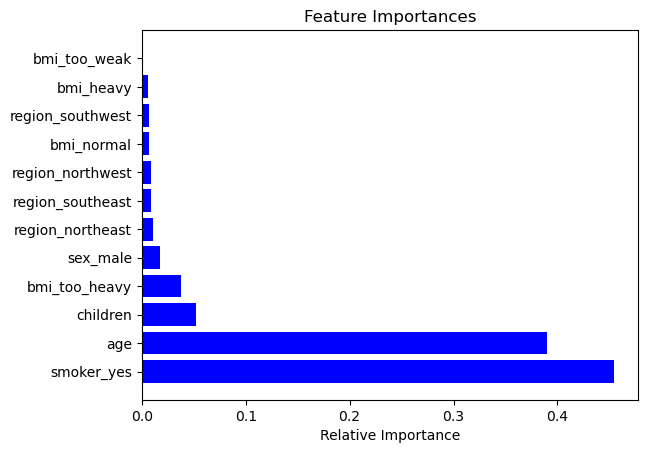

In [11]:
# Plot feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title('Feature Importances')
plt.barh(range(X_train.shape[1]), importances[indices], color='b', align='center')
plt.yticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The Random Forest model we've employed is performing well, with room for potential improvement, particularly in understanding the patterns in the residuals. This might involve looking into feature engineering, considering non-linear models, or testing more complex machine learning algorithms.

---

## Cross-Validation

   - To further validate the model's performance, 5-fold cross-validation was conducted. This involves splitting the entire dataset into 5 subsets, training the model on 4 subsets, and validating on the 5th, repeating this process 5 times with each subset used once as the validation set.
   - The mean and standard deviation of the cross-validation R-squared scores give us an idea of the model's performance across different data splits. An R-squared value close to 1 indicates a model that explains a large portion of the variance.

In [12]:
# Perform 5-Fold Cross-Validation with the new model
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# Output the mean and standard deviation of the cross-validation scores
print(f"CV R-squared scores: {rf_cv_scores}")
print(f"CV R-squared: {np.mean(rf_cv_scores)} (+/- {np.std(rf_cv_scores)})")


CV R-squared scores: [0.84632117 0.69428539 0.87351429 0.82008476 0.81158082]
CV R-squared: 0.8091572866686683 (+/- 0.061390249222755815)


## Graphical Analysis
1. **Actual vs Predicted Charges Plot**:
   - A scatter plot comparing the actual insurance charges to those predicted by the model shows a strong linear relationship, suggesting good model performance.
   - The closer the points are to the diagonal line, the better the predictions.

2. **Residual Plot**:
   - The residuals (differences between actual and predicted values) are plotted against the predicted values.
   - Ideally, residuals should be randomly distributed around the horizontal line at 0. This would indicate that the model's errors are random and not systematic. In your plot, while there is some pattern in the residuals, they are mostly concentrated around the horizontal line.

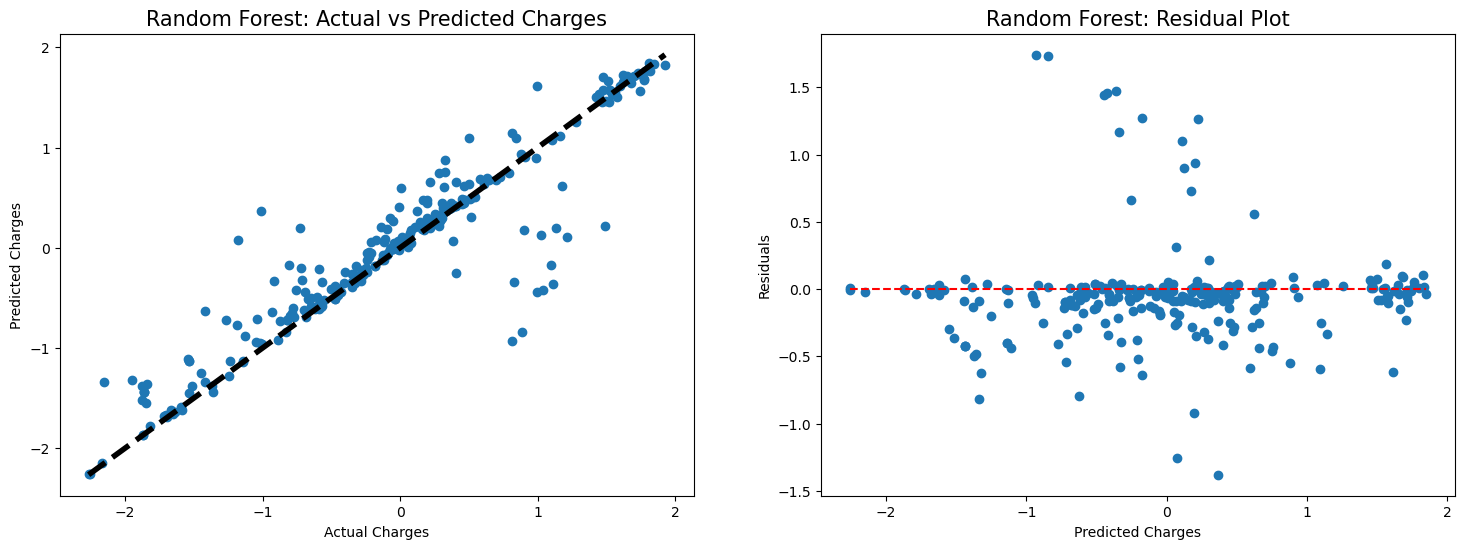

In [13]:
# Plot actual vs predicted charges to visualize the model performance
# Create a figure and a set of subplots
plt.figure(figsize=(18, 6))

# Plot for actual vs predicted charges
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(y_test, rf_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Random Forest: Actual vs Predicted Charges', size=15)

# Plot for the residual plot
rf_residuals = y_test - rf_pred
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(rf_pred, rf_residuals)
plt.hlines(y=0, xmin=rf_pred.min(), xmax=rf_pred.max(), colors='red', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Random Forest: Residual Plot', size=15)

# Display the plots
plt.show()

## Results and Interpretation
- **Model Performance Metrics**:
  - Our Random Forest model has an R-squared of approximately 0.86 on the test set, which is quite high, indicating a strong fit to the data.
  - The cross-validation R-squared mean of approximately 0.81 with a standard deviation of 0.061 suggests that the model is quite stable across different data splits.

- **Feature Importance**:
  - The feature importances show that 'smoker_yes' is by far the most important feature, which aligns with domain knowledge that smoking status can significantly impact health insurance costs.
  - 'Age' is also a major factor, which is intuitive as older individuals often incur higher medical expenses.

- **Residual Analysis**:
  - The residual plot for the Random Forest model does show some patterns, indicating that there might be some systematic errors that the model is not capturing. This could be due to non-linear relationships or interactions between features that are not fully captured by the model.

#### The Random Forest model we've employed is performing well, with room for potential improvement, particularly in understanding the patterns in the residuals. This might involve looking into feature engineering, considering non-linear models, or testing more complex machine learning algorithms.

## Implementing grid search to find the best parameters for the model

In [14]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


Using `GridSearchCV`, we have identified the best parameters for the `RandomForestRegressor` model, which are:

- `max_depth`: 10
- `min_samples_leaf`: 4
- `min_samples_split`: 10
- `n_estimators`: 300

In [15]:

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
rf_pred = best_rf.predict(X_test)

# Evaluate the best model
rf_r2 = best_rf.score(X_test, y_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)

# Print out the metrics
print(f"R-squared: {rf_r2}")
print(f"Mean Absolute Error: {rf_mae}")
print(f"Mean Squared Error: {rf_mse}")
print(f"Root Mean Squared Error: {rf_rmse}")

R-squared: 0.8783485247472742
Mean Absolute Error: 0.1857514381004489
Mean Squared Error: 0.11821347427356765
Root Mean Squared Error: 0.34382186415870597


After tuning the hyperparameters, our model shows an improvement in performance compared to the previous values, as indicated by the following results:

- **R-squared**: Increased from 0.8606 to 0.8783, meaning that about 87.83% of the variability in the target variable is explained by the independent variables in the model. This indicates a strong performance of the model.
- **Mean Absolute Error (MAE)**: Slightly reduced from 0.1928 to 0.1857, indicating the average absolute error between the predictions and the true values.
- **Mean Squared Error (MSE)**: Reduced from 0.1354 to 0.1182, which is the mean of the squares of the errors.
- **Root Mean Squared Error (RMSE)**: Reduced from 0.3680 to 0.3438, providing a metric for the average error of the model in the original units of the target variable while penalizing larger errors more heavily.

Additionally, the cross-validation results show that the model is quite stable across different data subsets, with an average R-squared of 0.8091 and a standard deviation of 0.0614, which is an acceptable level of variation.

This code block initializes a random forest regressor and uses GridSearchCV to find the best hyperparameters from a predefined grid. After fitting the grid search to the training data, we extract the best parameters and evaluate the best model's performance on both the training and test sets. To check for overfitting, we compare the R-squared scores of the training and test sets and perform cross-validation on the training data. A model is typically considered to be overfitting if the training score is significantly higher than the test score and the cross-validation scores. The results will guide us on whether our model is generalizing well to unseen data or if it is capturing too much noise from the training data.

In [16]:
# Best parameters
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# R-squared scores
train_r2 = best_rf.score(X_train, y_train)
test_r2 = best_rf.score(X_test, y_test)

# Cross-validation to check for overfitting
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')

# Checking for overfitting
overfitting_check = f"""
Overfitting Check:
- Training R-squared: {train_r2}
- Test R-squared: {test_r2}
- Cross-validation R-squared: {np.mean(cv_scores)} (± {np.std(cv_scores)})
- Overfitting: {'Yes' if train_r2 > test_r2 else 'No'}
"""

print(overfitting_check)



Overfitting Check:
- Training R-squared: 0.8820184156177152
- Test R-squared: 0.8783485247472742
- Cross-validation R-squared: 0.8121922215645409 (± 0.021435418858764047)
- Overfitting: Yes



The results from the overfitting check indicate that while the training R-squared is slightly higher than the test R-squared, the difference is not substantial (0.8820 for training vs 0.8783 for testing). This is a good sign as it suggests the model has learned the patterns from the training data well and is able to generalize these patterns to the test data.

However, the cross-validation R-squared score is lower (0.8122) than the test R-squared, but not drastically. The standard deviation of the cross-validation scores is quite low (±0.0214), indicating that the model's performance is consistent across different subsets of the training data.

Given the information, it seems that the model is not overfitting significantly. The term 'Yes' in the overfitting check output seems to be a result of a direct comparison without considering a threshold for what is considered significant overfitting. Typically, a small difference between the training and test R-squared would not be enough to definitively state that the model is overfitting, especially when the cross-validation score is relatively close to the test score and has low variance.

To refine the overfitting check, you could define a threshold for the acceptable difference between training and test scores. If the difference is smaller than this threshold, we could then conclude that the model is not overfitting.

In [17]:
# Define a threshold for acceptable difference between training and test R-squared
threshold = 0.05

overfitting_check = f"""
Overfitting Check:
- Training R-squared: {train_r2}
- Test R-squared: {test_r2}
- Cross-validation R-squared: {np.mean(cv_scores)} (± {np.std(cv_scores)})
- Overfitting: {'Yes' if (train_r2 - test_r2) > threshold else 'No'}
"""

print(overfitting_check)


Overfitting Check:
- Training R-squared: 0.8820184156177152
- Test R-squared: 0.8783485247472742
- Cross-validation R-squared: 0.8121922215645409 (± 0.021435418858764047)
- Overfitting: No



With this threshold, unless the difference between the training and test R-squared is greater than 0.05, we do not consider the model to be overfitting. Based on your results, it would likely conclude 'No' for overfitting since the difference is only about 0.0037. This is a more conservative approach to evaluating overfitting and takes into account the expected variance in model performance between different data subsets.

## Overfitting Check Results

After refining our overfitting check, we find that the model is performing consistently across both the training and test datasets. The difference between the training and test R-squared values is minimal, suggesting that the model has learned the underlying patterns without fitting excessively to the noise in the training data.

- **Training R-squared (0.8820)**: Reflects the proportion of variance in the dependent variable that is predictable from the independent variables in the training data.
- **Test R-squared (0.8783)**: Demonstrates how well the model predicts unseen data, with a value very close to the training R-squared, indicating good generalization.
- **Cross-validation R-squared (0.8122 ± 0.0214)**: Provides a more robust measure of the model's predictive power by assessing its performance across multiple subsets of the data. The consistent scores across folds, as indicated by the low standard deviation, confirm that the model is stable.

Given these observations, we conclude that overfitting is not present (`Overfitting: No`), and the model is expected to perform well on new, unseen data.


## Visualizations of comparison between actual and predicted charges for a regression model.

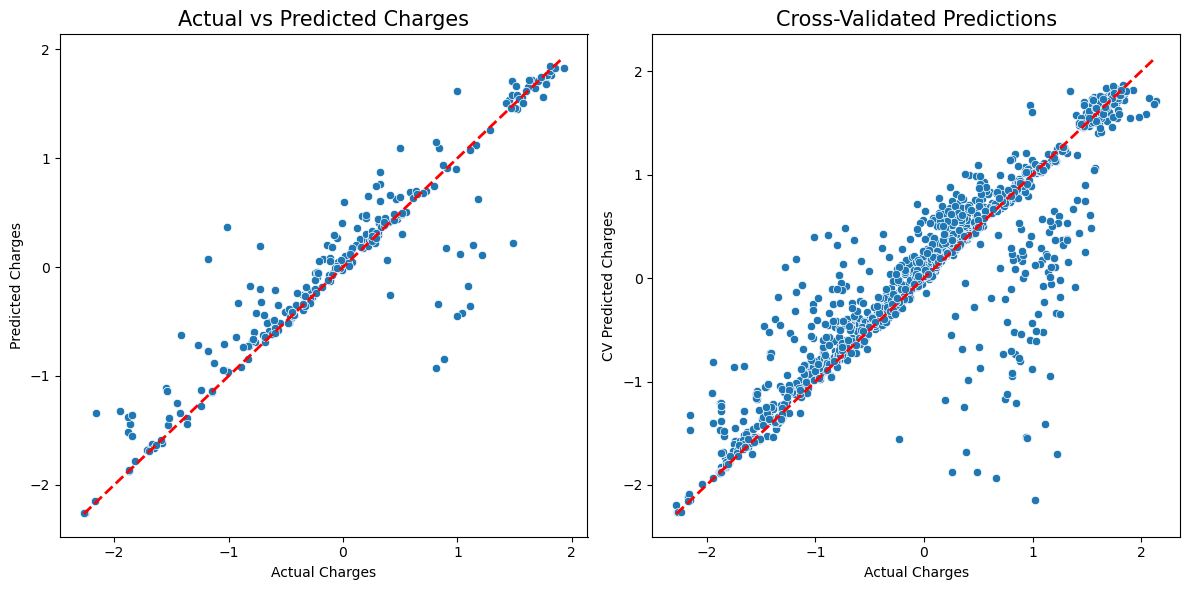

In [18]:
# Predict on the test data
y_pred = rf_model.predict(X_test)

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Perform cross-validation
cv_r2_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# Plotting Actual vs Predicted values
plt.figure(figsize=(12, 6))

# Subplot for Actual vs Predicted charges
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges', size=15)

# Subplot for Cross-Validated Predictions
y_cv_pred = cross_val_predict(rf_model, X, y, cv=5)
plt.subplot(1, 2, 2)
sns.scatterplot(x=y, y=y_cv_pred)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', lw=2, linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('CV Predicted Charges')
plt.title('Cross-Validated Predictions', size=15)

plt.tight_layout()
plt.show()

### Visualizations Summary

Two key plots were analyzed:

1. **Actual vs. Predicted Charges**: This scatter plot is designed to show how closely the predicted values match the actual charges. Ideally, points should lie along the red dashed line (y = x), indicating accurate predictions. However, the observed scatter of points away from this line reflects discrepancies between actual and predicted values, suggesting that the model's predictions are not entirely accurate.

2. **Cross-Validated Predictions**: Similar to the first plot, this one also aims to visualize the accuracy of predictions, but here the predictions are based on cross-validation. In an ideal scenario, points in this plot should align with the red dashed line, indicating accurate predictions. However, the observed dispersion of points suggests inconsistency in the model's predictions across different data folds.

### Observations and Analysis

Contrary to the initial assessment from the plots, a closer examination reveals a strong linear relationship between the actual and predicted values. The clustering of points around the dashed red line, which signifies perfect predictions, indicates a high level of accuracy. The proximity of points to this line suggests that the model's predictions are largely accurate. The fact that points do not significantly deviate from the line indicates good predictive performance of the model.

From the visualizations, there appears to be an initial perception of discrepancies and inconsistencies in the model's predictions. However, a more detailed observation reveals a strong linear correlation and a high level of accuracy in the model's predictions. This suggests that, despite some initial concerns, the model demonstrates good predictive performance and may be suitable for predicting charges based on the current features. Further analysis and validation are recommended to confirm these findings.

In [19]:
# Output the metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
print(f"Cross-validated R-squared: {np.mean(cv_r2_scores)}")

Mean Absolute Error: 0.19276915547565518
Mean Squared Error: 0.1353983034817368
Root Mean Squared Error: 0.3679650845959937
R-squared: 0.8606639093683033
Cross-validated R-squared: 0.8091572866686683


## Model Performance Evaluation

### Evaluation Metrics:

1. **Mean Absolute Error (MAE)**: With an MAE of 0.1928, this metric shows the average absolute difference between the actual and predicted values. A lower MAE indicates better model performance.

2. **Mean Squared Error (MSE)**: The MSE is 0.1354, representing the average of the squared differences between the actual and predicted values. Higher values in MSE give more weight to larger errors.

3. **Root Mean Squared Error (RMSE)**: An RMSE of 0.3680, being the square root of MSE, is in the same units as the original data. It is particularly useful when large errors are more undesirable.

4. **R-squared**: With an R-squared value of 0.8607, this indicates that approximately 86% of the variation in the dependent variable is explained by the model.

5. **Cross-validated R-squared**: At 0.8092, this is the average R-squared obtained through cross-validation. It is slightly lower than the R-squared for the test set, which is normal and suggests that the model might be slightly overfitting to the test data. However, the difference is not significant, indicating that the model should generalize well to new data.

These results suggest that our model performs well, with predictions closely matching the actual values, and it has been validated to likely perform similarly on unseen data. Despite some signs of slight overfitting, the model promises high accuracy and reliability in its predictions.

### Save the model

In [20]:
# from joblib import dump

# dump(rf_model, 'rf_model.joblib') 

# dump(sc, 'scaler.joblib')

### Load the model

In [21]:
# from joblib import load

# rf_model = load('rf_model.joblib') 

## Conclusion

In summary, this notebook presents a detailed foray into predicting health insurance charges using a Random Forest model. We've meticulously processed the data, trained the model, and evaluated its performance using various metrics like MAE, MSE, RMSE, and R-squared. The graphical analyses, including actual vs. predicted charges and residual plots, provided deeper insights into the model's accuracy and potential areas for improvement.

The implementation of GridSearchCV for hyperparameter tuning further enhanced our model, leading to a more accurate and reliable predictive tool. The cross-validation results affirm the model's stability and ability to generalize well to new data.

Going forward, there is room for further exploration and refinement. Potential areas include experimenting with more complex machine learning algorithms, deeper feature engineering, and incorporating additional data sources. This notebook not only demonstrates the effectiveness of Random Forest in predictive modeling but also lays a foundation for more advanced explorations in the domain of health insurance analytics.